<p id="part0"></p>

<p style="font-family: Times New Roman; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: left; color: black"> Project3(Alx-t): Data visualization (Loan Data From Prosper) </p>
<p style="font-family: Times New Roman; line-height: 2; font-size: 16px; font-weight: bold; letter-spacing: 2px; text-align: left; color: black">By: Emmanuel Favour</p>


In [1]:
#Importing all needed libraries.......
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings("ignore")# to ingore some filter warnings especially from the seaborn library
%matplotlib inline

## DATA WRANGLING

#### DATA GATHERING

In [2]:
#loading the dataset........
loan_dt = pd.read_csv('prosperLoanData.csv')
loan_dt.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


#### DATA ACESSMENT

In [3]:
#getting the dataset info()
loan_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
#getting a list of all columns
loan_dt.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
#getting the total number of row and columns for the dataset
loan_dt.shape

(113937, 81)

In [6]:
#getting sum of all null values present across all columns.
loan_dt.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [7]:
#getting  sum of duplicated rows for ListingKey 
loan_dt['ListingKey'].duplicated().value_counts()

False    113066
True        871
Name: ListingKey, dtype: int64

In [8]:
#getting sum of duplcated rows ListingNumber
loan_dt['ListingNumber'].duplicated().sum()

871

In [9]:
#getting value count for ListingNumber
loan_dt['ProsperRating (numeric)'].value_counts()

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64

In [10]:
#getting value count for ProsperRating (Alpha)
loan_dt['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [11]:
#getting sum of duplicated rows for ListingCreationDate
loan_dt['ListingCreationDate'].duplicated().value_counts()

False    113064
True        873
Name: ListingCreationDate, dtype: int64

In [12]:
#getting value count for LoanStatus
loan_dt['LoanStatus'].value_counts()   

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [13]:
#getting value count for BorrowerState
loan_dt['BorrowerState'].value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

In [14]:
#getting value count for Occupation
loan_dt['Occupation'].value_counts()   

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [15]:
#getting value count for EmploymentStatus
loan_dt['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [16]:
#getting value count for GroupKey
loan_dt['GroupKey'].value_counts()

783C3371218786870A73D20    1140
3D4D3366260257624AB272D     916
6A3B336601725506917317E     698
FEF83377364176536637E50     611
C9643379247860156A00EC0     342
                           ... 
3AC33365576889313A6722F       1
199A33716841673327BF690       1
398233659571461105A2C60       1
49753420463763105C8092D       1
D1413413671123312FAD936       1
Name: GroupKey, Length: 706, dtype: int64

In [17]:
#getting value count for FirstRecordedCreditLine
loan_dt['FirstRecordedCreditLine'].value_counts()

1993-12-01 00:00:00    185
1994-11-01 00:00:00    178
1995-11-01 00:00:00    168
1990-04-01 00:00:00    161
1995-03-01 00:00:00    159
                      ... 
1979-01-05 00:00:00      1
1978-09-11 00:00:00      1
1980-03-10 00:00:00      1
1981-07-18 00:00:00      1
2006-09-10 00:00:00      1
Name: FirstRecordedCreditLine, Length: 11585, dtype: int64

In [18]:
#getting value count for IncomeRange
loan_dt['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [19]:
#getting value count for LoanOriginationQuarter
loan_dt['LoanOriginationQuarter'].value_counts()

Q4 2013    14450
Q1 2014    12172
Q3 2013     9180
Q2 2013     7099
Q3 2012     5632
Q2 2012     5061
Q1 2012     4435
Q4 2012     4425
Q2 2008     4344
Q4 2011     3913
Q1 2013     3616
Q3 2008     3602
Q2 2007     3118
Q3 2011     3093
Q1 2007     3079
Q1 2008     3074
Q3 2007     2671
Q4 2007     2592
Q2 2011     2478
Q4 2006     2403
Q3 2006     1934
Q1 2011     1744
Q4 2010     1600
Q2 2010     1539
Q4 2009     1449
Q3 2010     1270
Q2 2006     1254
Q1 2010     1243
Q3 2009      585
Q4 2008      532
Q1 2006      315
Q4 2005       22
Q2 2009       13
Name: LoanOriginationQuarter, dtype: int64

In [20]:
#getting value count for FirstRecordedCreditLine
loan_dt['FirstRecordedCreditLine'].value_counts()

1993-12-01 00:00:00    185
1994-11-01 00:00:00    178
1995-11-01 00:00:00    168
1990-04-01 00:00:00    161
1995-03-01 00:00:00    159
                      ... 
1979-01-05 00:00:00      1
1978-09-11 00:00:00      1
1980-03-10 00:00:00      1
1981-07-18 00:00:00      1
2006-09-10 00:00:00      1
Name: FirstRecordedCreditLine, Length: 11585, dtype: int64

In [21]:
#Describing a dataset to get basic statistical information.
loan_dt.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [22]:
#Getting info() about the dataset.
loan_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

#### Quality

##### `prosperLoanData` table
- Duplicate data i.e there are 871 duplicated data in the  ListingKey column which is a unique key.
- Some categorical ordinal data have missing data
- Some columns have missing data.


#### Tidiness

##### `prosperLoanData` table
- Many columns are not needed for this particular analysis. i.e the needed columns are 'ListingKey', 'Term', 'LoanStatus', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'ProsperRating' 

#### DATA CLEANING

In [23]:
#Creating a data copy
loan_dt_clean = loan_dt.copy()

#### Define
#### (Duplicate data i.e there are 871 duplicated data in the  ListingKey column which is a unique key.)
* Use the pd.drop_duplicated() to remove duplicate keys.

#### Code

In [24]:
#Dropping duplicate values.
loan_dt_clean = loan_dt_clean.drop_duplicates(subset=['ListingKey'])

#### Test

In [25]:
#Testing to see if duplicate values have been dropped
loan_dt_clean ['ListingKey'].duplicated().value_counts()

False    113066
Name: ListingKey, dtype: int64

#### Define
#### (Some categorical ordinal data have missing data.)


#### Code

In [26]:
#Using fillna() to replace all null values in ProsperRating (numeric) with 0.0
loan_dt_clean ['ProsperRating (numeric)'] = loan_dt_clean ['ProsperRating (numeric)'].fillna(0.0)

#using the loc[] to replace every 0.0 in ProsperRating (numeric) with No Rating in ProsperRating (Alpha).
loan_dt_clean.loc[(loan_dt_clean['ProsperRating (numeric)'] == 0.0), 'ProsperRating (Alpha)'] = 'No rating'

#### Test

In [27]:
#Testing to see if there are still null values
loan_dt_clean['ProsperRating (Alpha)'].value_counts()

No rating    29084
C            18096
B            15368
A            14390
D            14170
E             9716
HR            6917
AA            5325
Name: ProsperRating (Alpha), dtype: int64

#### Define
#### (Many columns are not needed for this particular analysis. i.e the needed columns are 'ListingKey', 'Term', 'LoanStatus', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'ProsperRating (Alpha)', 'LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'IsBorrowerHomeowner', 'BorrowerRate',  'IncomeRange'.)
* Drop all columns execpt from the mentioned columns

#### Code

In [28]:
#Adding only columns needed to the loan_dt_clean dataset 
loan_dt_clean = loan_dt_clean[['ListingKey', 'Term', 'LoanStatus', 'BorrowerState', 'EmploymentStatus', 'ProsperRating (Alpha)', 'LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginationDate', 'IsBorrowerHomeowner', 'BorrowerRate',  'IncomeRange']]

#### Test

In [29]:
#Checking the info() of the dataset
loan_dt_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ListingKey             113066 non-null  object 
 1   Term                   113066 non-null  int64  
 2   LoanStatus             113066 non-null  object 
 3   BorrowerState          107551 non-null  object 
 4   EmploymentStatus       110811 non-null  object 
 5   ProsperRating (Alpha)  113066 non-null  object 
 6   LoanOriginalAmount     113066 non-null  int64  
 7   BorrowerAPR            113041 non-null  float64
 8   StatedMonthlyIncome    113066 non-null  float64
 9   LoanOriginationDate    113066 non-null  object 
 10  IsBorrowerHomeowner    113066 non-null  bool   
 11  BorrowerRate           113066 non-null  float64
 12  IncomeRange            113066 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 11.3+ MB


In [30]:
#Dropping null values in 'BorrowerState' and 'EmploymentStatus'
loan_dt_clean= loan_dt_clean.dropna(subset=['BorrowerState'])
loan_dt_clean= loan_dt_clean.dropna(subset=['EmploymentStatus'])

In [31]:
#Checking for null values 
loan_dt_clean['BorrowerState'].isnull().sum()
#getting info() about loan_dt_clean
loan_dt_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106683 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ListingKey             106683 non-null  object 
 1   Term                   106683 non-null  int64  
 2   LoanStatus             106683 non-null  object 
 3   BorrowerState          106683 non-null  object 
 4   EmploymentStatus       106683 non-null  object 
 5   ProsperRating (Alpha)  106683 non-null  object 
 6   LoanOriginalAmount     106683 non-null  int64  
 7   BorrowerAPR            106683 non-null  float64
 8   StatedMonthlyIncome    106683 non-null  float64
 9   LoanOriginationDate    106683 non-null  object 
 10  IsBorrowerHomeowner    106683 non-null  bool   
 11  BorrowerRate           106683 non-null  float64
 12  IncomeRange            106683 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 10.7+ MB


In [32]:
#Converting to data type for LoanOriginationDate to datetime
loan_dt_clean['LoanOriginationDate'] = pd.to_datetime(loan_dt_clean['LoanOriginationDate'])
#Extracting year from the datetime series
loan_dt_clean['year'] = loan_dt_clean['LoanOriginationDate'].dt.year
# creating month column with an Index of formatted strings specified by the date_format using the dt.strftime('%b ') function
loan_dt_clean['month']= loan_dt_clean['LoanOriginationDate'].dt.strftime('%b')
loan_dt_clean.to_csv("loan_dt_cleaned", index = False)

In [33]:
#checking to see the new columns created.
loan_dt_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106683 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ListingKey             106683 non-null  object        
 1   Term                   106683 non-null  int64         
 2   LoanStatus             106683 non-null  object        
 3   BorrowerState          106683 non-null  object        
 4   EmploymentStatus       106683 non-null  object        
 5   ProsperRating (Alpha)  106683 non-null  object        
 6   LoanOriginalAmount     106683 non-null  int64         
 7   BorrowerAPR            106683 non-null  float64       
 8   StatedMonthlyIncome    106683 non-null  float64       
 9   LoanOriginationDate    106683 non-null  datetime64[ns]
 10  IsBorrowerHomeowner    106683 non-null  bool          
 11  BorrowerRate           106683 non-null  float64       
 12  IncomeRange            106683 non-null  obje

## Exploratory Data Analysis

### Defining some functions to allow for re-use

In [34]:

def Prosper_countplot (x,y,df,x_data,index,angle,x_label,y_label,val):
    '''This function helps to create a countplot and require the following variables, 'x,y,df,x_data,index,angle,x_label,y_label,val' '''
    plt.figure(figsize = (x,y))
    base_color = sns.color_palette()[index]
    ax = sns.countplot(data = df, x = x_data, color = base_color)
    plt.bar_label(ax.containers[0],size=val)
    plt.xticks(rotation= angle)
    plt.xlabel(x_label)
    plt.ylabel(y_label);

def Prosper_pie (column):    
    '''This function helps to create a pie chart and it requires the variable 'column' '''
    sorted_counts = loan_dt_clean[column].value_counts()
    plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%2.2f%%', startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4} );
     # We have the used option `Square`.
     # Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
    plt.axis('square');

def Prosper_distplot (x, y, column, index, angle, no_of_bins, Bool, x_label, y_label ):      
    '''This function helps to create a histogram and it requires the variables  'x, y, column, index, angle, no_of_bins, Bool, x_label, y_label' '''
    plt.figure(figsize=(x,y))
    base_color = sns.color_palette()[index]
    ax = sns.distplot(loan_dt_clean[column], color = base_color, bins = no_of_bins, kde = Bool)
    plt.xticks(rotation=angle)
    plt.xlabel(x_label)
    plt.ylabel(y_label);

### Univariate Plot

#### What is the employment status of most of Prospers clients
* A larger percentage of them are employed, a good number of them are full time eployees while the rest of them are either nopartime retired or not employed.

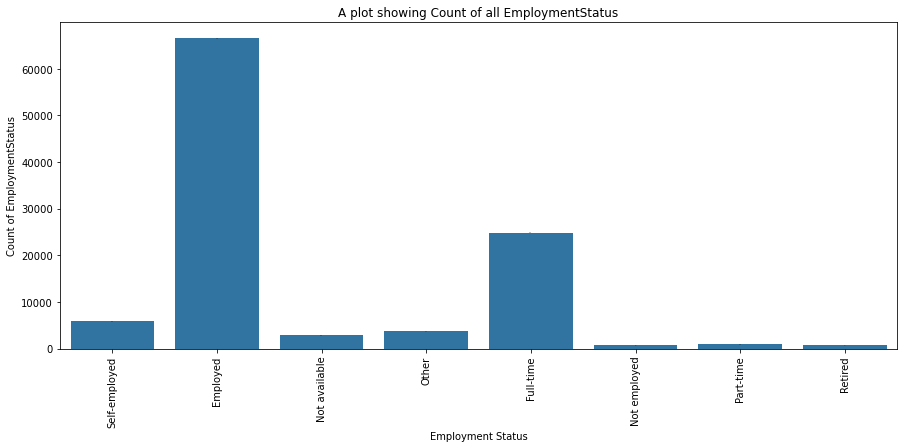

In [50]:
# calling the Countplot() function to show a count of the employmentstatus all through the dataset.
Employment_Status = Prosper_countplot(15,6,loan_dt_clean, 'EmploymentStatus', 0,90, 'Employment Status','Count of EmploymentStatus',0 )
plt.title('A plot showing Count of all EmploymentStatus');

#### which of the state have the highest number of borrowers.
* Califonia CA seems to be leading the pack with more than 14000 borrowers.

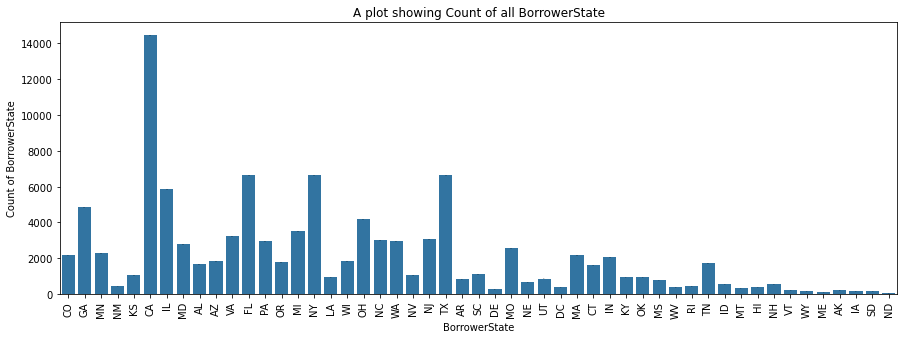

In [36]:
# Using a Countplot function to show a count of distinct BorrowerState all through the dataset.
Employment_Status = Prosper_countplot(15,5,loan_dt_clean, 'BorrowerState', 0,90, 'BorrowerState','Count of BorrowerState',0)
plt.title('A plot showing Count of all BorrowerState');

#### Which of the Terms has the highest Ocurrence
* 36 Terms is clearly the most occuring followed by 60 and the least is 30 Term.

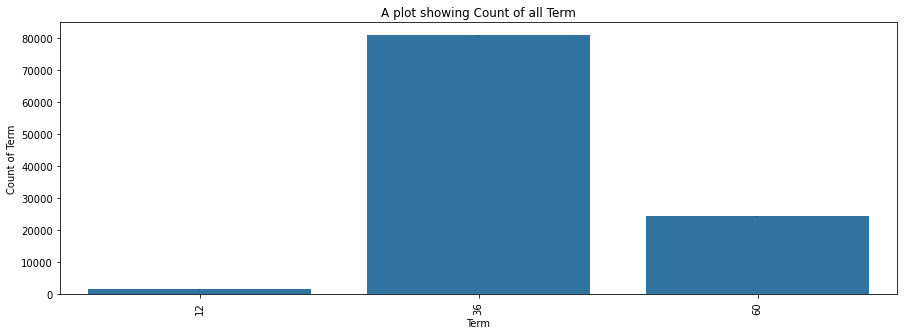

In [37]:
#Ploting a barchart using the countplot() to show the number of distinct 'Term' across the dataset. 
Employment_Status = Prosper_countplot(15,5,loan_dt_clean, 'Term', 0,90, 'Term','Count of Term',0)
plt.title('A plot showing Count of all Term');

#### what percentage of the borrowers are home owners.
* Only 51.58% of the Borrowers are Home owners.

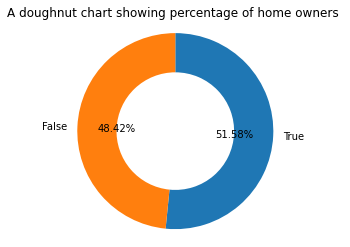

In [38]:
#Calling the proper_pie function to get the percentage of borrowers that are homeowners.
Home_owner = Prosper_pie('IsBorrowerHomeowner')
plt.title('A doughnut chart showing percentage of home owners ');

#### what kind of distribution is LoanOriginalAmount.
* LoanOriginalAmount is a multimodal  distribution and starts from 1000, with its highest peak at about 17,500.
* This shows that the amount the borrowers collected is widely distributed, between 1000 and slight close to 3500 dollars

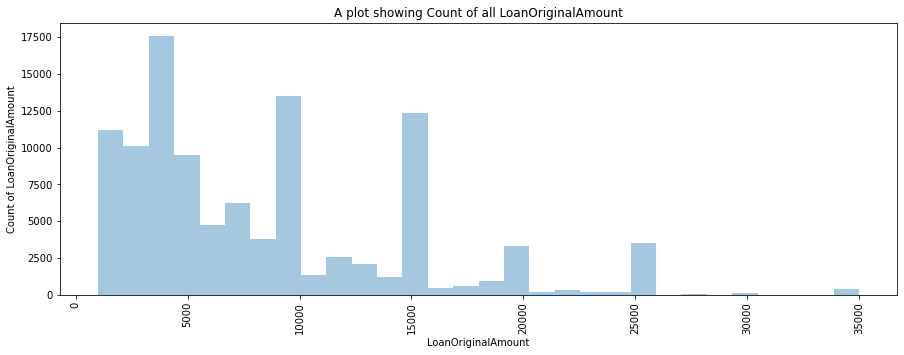

In [39]:
#Using the distplot function to plot a histogram showing the the distribution of LoanOriginalAmount across the dataset.
Loan_original_amount = Prosper_distplot (15, 5, 'LoanOriginalAmount', 0, 90, 30, False, 'LoanOriginalAmount', 'Count of LoanOriginalAmount')
plt.title('A plot showing Count of all LoanOriginalAmount');

#### Which of the loan status is most Dominant.
* Current and Completed are the most dominant.  
* 10.2% of the entire loan has been charged off as bad debt.

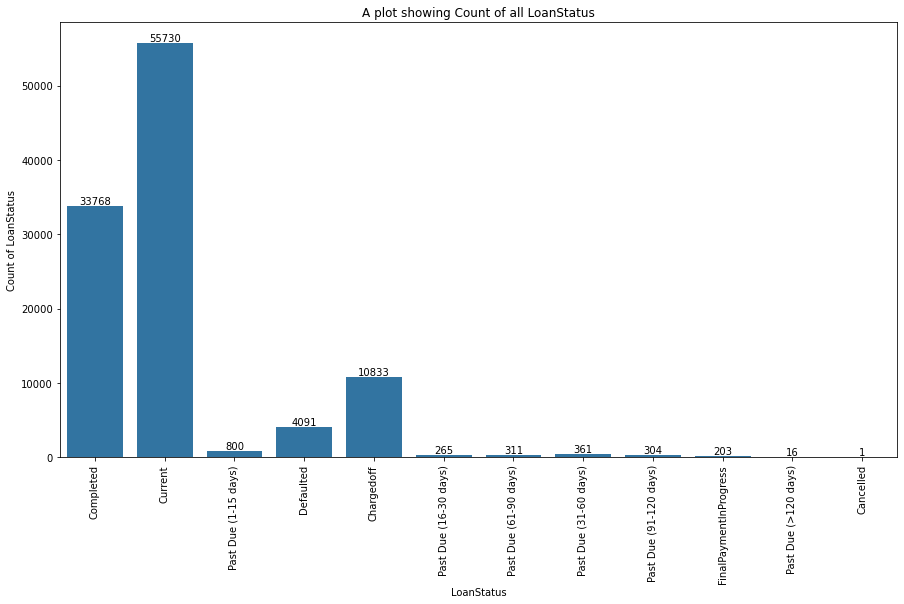

In [40]:
# Creating a bar chart using the countplot to show count on loanstatus
#Increasing the plot size.
Employment_Status = Prosper_countplot(15,8,loan_dt_clean, 'LoanStatus', 0,90, 'LoanStatus','Count of LoanStatus',10)
plt.title('A plot showing Count of all LoanStatus');

# Percentage charged off as bad debt.       
# status = loan_dt_clean['LoanStatus'].count()
# gain = 10833/status * 100
# gain = 10.154382610162818

### Bivariate Analysis

#### What is the relationship between year and BorrowerAPR
* The distribution shows that 2006 had 0.2% with a slight fall to 2007 and a gradual increase till 2011 which was the highest APR % rate about 0.25%. A steady fall occurred from 2012 to 2014.

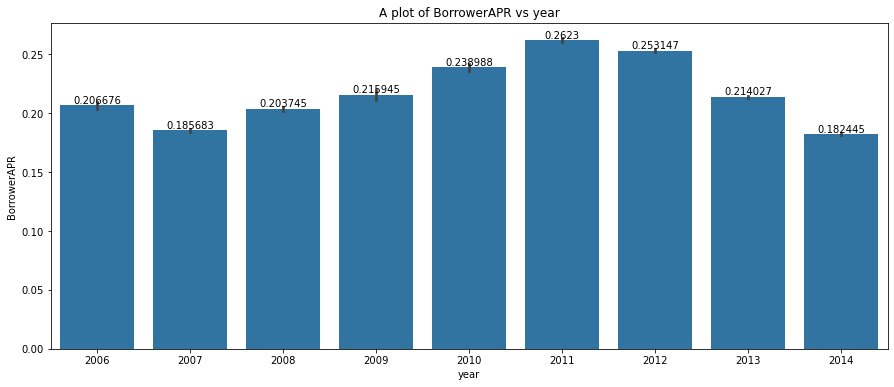

In [41]:
# creating a barplot to show distribution of BorrowerAPR across the years.
base_color = sns.color_palette()[0]
plt.figure(figsize= (15,6))
ax = sns.barplot(data = loan_dt_clean, x = 'year', y = 'BorrowerAPR', color = base_color )
#to label bars with their respective values.
for i in ax.containers:
    ax.bar_label(i,)

plt.title('A plot of BorrowerAPR vs year')
plt.xlabel('year')
plt.ylabel('BorrowerAPR');    


#### What is the correlation between LoanOriginalAmount and BorrowerAPR
* This plot shows a negative correlation between the borrowerAPR and LoanOriginalAmount the  the range of borrowerAPR decrease with the increase of LoanOriginalAmount.

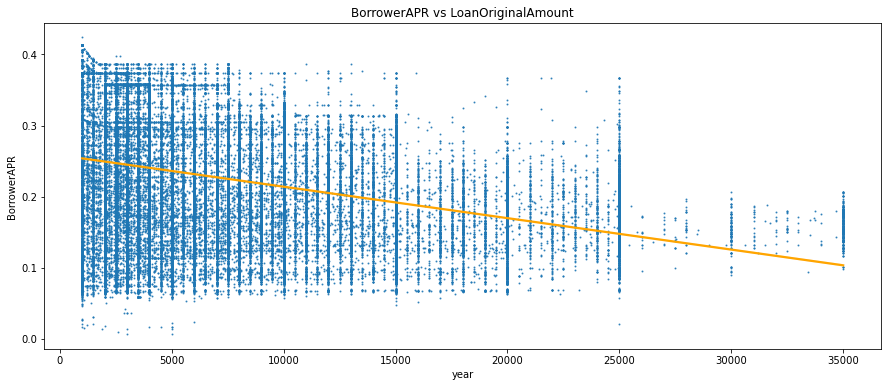

In [42]:
#Using the regplot function to create a scatter plot showing correlation between LoanOriginalAmount and BorrowerAPR
plt.figure(figsize = [15, 6])
sns.regplot(data = loan_dt_clean, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'s':1}, line_kws={'color':'Orange'})
plt.title('BorrowerAPR vs LoanOriginalAmount')
plt.xlabel('year')
plt.ylabel('BorrowerAPR');    

#### What is the yearly trend of borrowerRates?
* It is interesting to see that the median of the distribution(borrowerRates) goes high up after 2008 until 2011. And since then, there has been a decline in the median value for  borrowerRates until 2014.


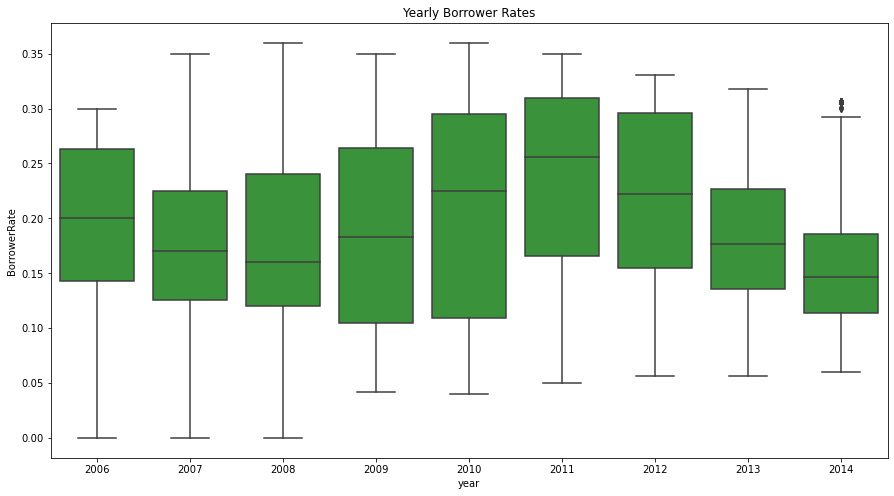

In [43]:
# Creating a boxplot to show the relationship between BorrowerRate across the years.
plt.figure(figsize=[15, 8]);
base_color = sns.color_palette()[2];
sns.boxplot(data =loan_dt_clean, x = 'year', y = 'BorrowerRate', color = base_color);
plt.title('Yearly Borrower Rates');

#### Does the Employment Status affect the Amount of Loan Taken ?
* It can be seen from the pointplot  that the borrowers who are Employed, haves Loans of Higher Amounts when compared to borrowers with other categories of employment.
* Also borrowers who are Retired & Not Employed, have taken loans of Lower Amounts when compared with other Employment categories.

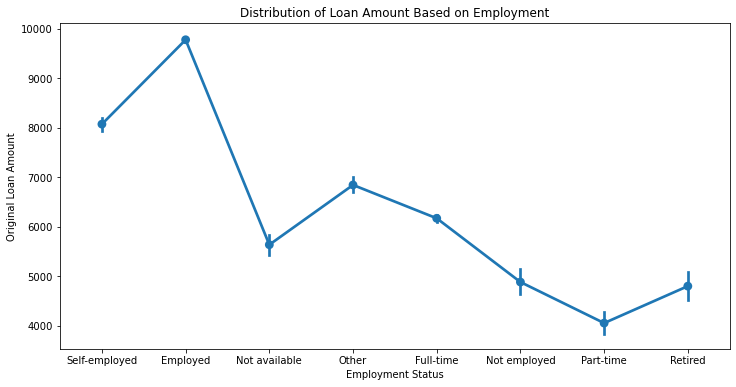

In [44]:
#Using the pointplot() to show how Does the Employment Status affect the Amount of Loan Taken.
fig = plt.figure(figsize=(12,6))
sns.pointplot(y='LoanOriginalAmount', x='EmploymentStatus', data=loan_dt_clean)
plt.title('Distribution of Loan Amount Based on Employment')
plt.xlabel('Employment Status')
plt.ylabel('Original Loan Amount')
plt.show()


#### What is the average borrower APR distribution by Month
* There is only a slightly noticeable change from jan to feb and a steady increase until April which maintains a constant rate till may, there are noticeable increment from may till september after which we experience a rapid declination in the BorrowerAPR value.

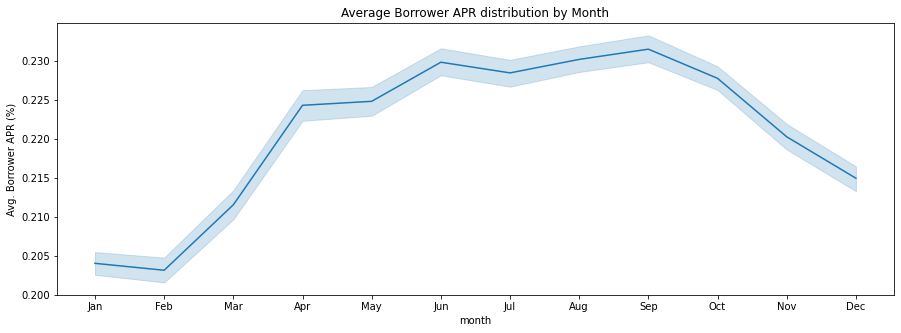

In [45]:
# setting order categories by month
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# ordering it into a categorical type data
set_m = pd.api.types.CategoricalDtype(ordered=True, categories=month)
# setting it into the prosper rating
loan_dt_clean['month'] = loan_dt_clean['month'].astype(set_m)
plt.figure(figsize = [15, 5])
# creating a line plot to show the distribution
sns.lineplot(data=loan_dt_clean,x='month',y='BorrowerAPR');
plt.ylabel('Avg. Borrower APR (%)');
plt.title('Average Borrower APR distribution by Month');

#### How does LoanAmount_range affect BorrowerAPR
* There is a steady declination in the maen rate from 1k-15k then produces an irregular trend from 15k-25k, then goes to show that the highest LoanAmount_range experience a significant drop in there mean rate.

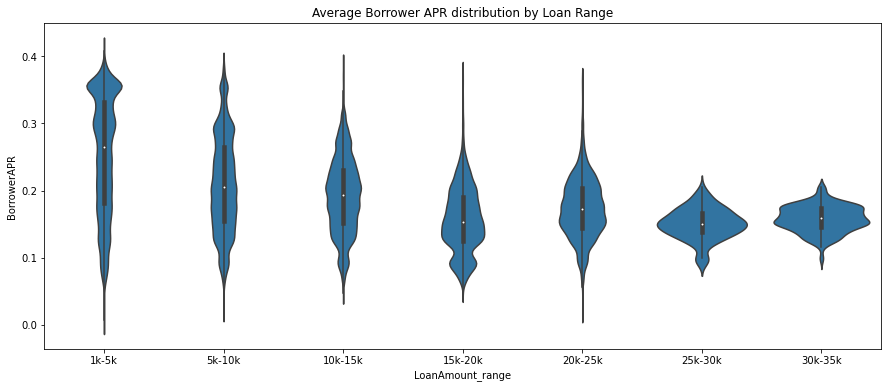

In [46]:
# using the .cut function to create a new column for loan amount range
loan_dt_clean['LoanAmount_range']=pd.cut(loan_dt_clean.LoanOriginalAmount,bins=[1000,5000,10000,15000,20000,25000,30000,35000],labels=['1k-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
plt.figure(figsize = [15, 6])
base_color = sns.color_palette()[0]
# plotting the violinplot
sns.violinplot(data=loan_dt_clean, x='LoanAmount_range', y='BorrowerAPR', color=base_color);
plt.title('Average Borrower APR distribution by Loan Range');

#### BorrowerRate vs. Employmentstatus and BorrowerRate vs. IncomeRange
* individuals who are employed don't necessarily have lower BorrowerRate. But unemployment does have a higher median BorrowerRate and higher concentrate of frequency are above the median. Looking at the income range plot, there is a slight trend that the higher the income range is,the lower median BorrowerRate.

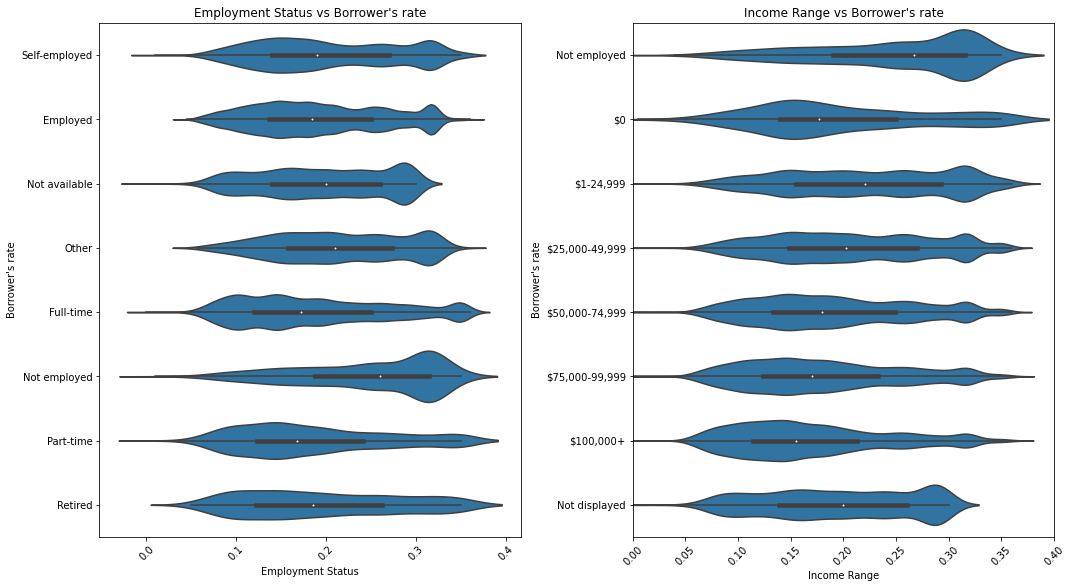

In [47]:
 # creating a boxplot clearly showing the median distribution between BorrowerRate vs. Employmentstatus and BorrowerRate vs. IncomeRange

plt.figure(figsize=[15, 8.27]);
colorChoice = sns.color_palette()[0]

plt.subplot(1,2,1)
sns.violinplot(data = loan_dt_clean, y = 'EmploymentStatus', x = 'BorrowerRate', color=colorChoice);
plt.title('Employment Status vs Borrower\'s rate');
plt.ylabel('Borrower\'s rate');
plt.xlabel('Employment Status');
plt.xticks(rotation=45);

plt.subplot(1,2,2)
income_order = ['Not employed', '$0', '$1-24,999', '$25,000-49,999','$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed']
sns.violinplot(data = loan_dt_clean, y = 'IncomeRange', x = 'BorrowerRate', color=colorChoice, order = income_order);
plt.title('Income Range vs Borrower\'s rate');
plt.ylabel('Borrower\'s rate');
plt.xlabel('Income Range');
plt.xticks(rotation=45);
plt.xlim(0,0.4);

plt.tight_layout()

### Multivariate Analysis

#### How does the Borrower APR affect LoanAmount_range and Homeownership
* LoanAmount_range has a negative corellation with Borrower APR while is no major effect Borrower APR on Homeownership

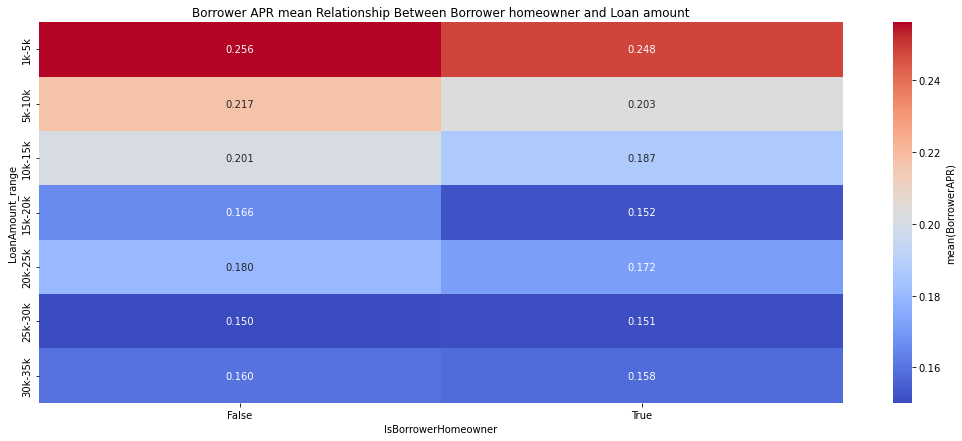

In [48]:
 #Using the heatmap() to show the Relationship amongs the Borrower APR affect LoanAmount_range and Homeownership
group=loan_dt_clean.groupby(['LoanAmount_range','IsBorrowerHomeowner']).mean()['BorrowerAPR']
group=group.reset_index(name='BorrowerAPR_mean')
group=group.pivot(index = 'LoanAmount_range', columns = 'IsBorrowerHomeowner', values = 'BorrowerAPR_mean')
plt.figure(figsize = [18,7 ]);
sns.heatmap(group,annot = True, fmt = '.3f',cbar_kws = {'label' : 'mean(BorrowerAPR)'}, cmap="coolwarm");
plt.title('Borrower APR mean Relationship Between Borrower homeowner and Loan amount');

#### Does the term have a significance effect on the LoanAmount_range and BorrowerAPR
* The barplots shows that the longer term(60 months) had higher borrowerAPR. which means the longer the term the individual collect the loan the more likely the BorrowerAPR increases.

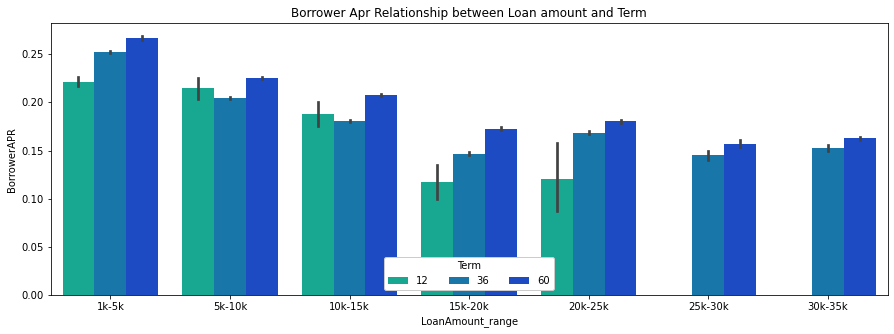

In [49]:
# creating a bar plot for the distribution
plt.figure(figsize = [15, 5])
Axi = sns.barplot(data=loan_dt_clean, x='LoanAmount_range', y='BorrowerAPR', hue='Term', palette="winter_r")
Axi.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Term')
plt.title("Borrower Apr Relationship between Loan amount and Term");

## Conclusion

From this analysis, individuals who are employed don't necessarily have lower BorrowerRate. But unemployment does have a higher median BorrowerRate and higher concentrate of frequency are above the median. Looking at the income range plot, there is a slight trend that the higher the income range is,the lower median BorrowerRate. Also individuals who are employed don't necessarily have lower BorrowerRate. But unemployment does have a higher median BorrowerRate and higher concentrate of frequency are above the median. Looking at the income range plot, there is a slight trend that the higher the income range is,the lower median BorrowerRate.